In [245]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [246]:
img = cv2.imread('./model/test_data/20221030_170547.jpg')
#print (img)
img.shape

(3596, 2032, 3)

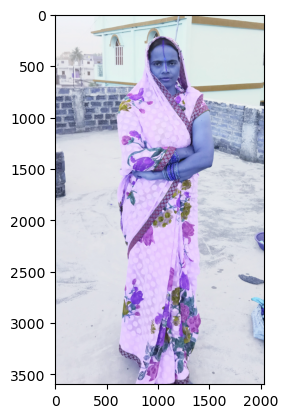

In [247]:
plt.imshow(img)

In [248]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3596, 2032)

In [249]:
gray

array([[245, 245, 245, ..., 236, 236, 236],
       [245, 245, 245, ..., 236, 236, 236],
       [245, 245, 245, ..., 235, 235, 235],
       ...,
       [225, 226, 226, ..., 222, 224, 225],
       [225, 225, 225, ..., 222, 224, 225],
       [225, 225, 225, ..., 223, 225, 225]], dtype=uint8)

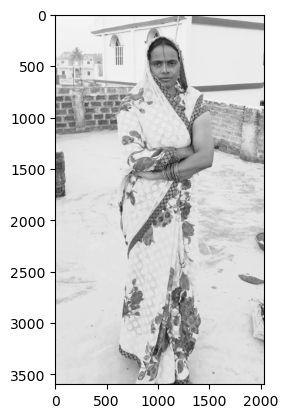

In [250]:
plt.imshow(gray, cmap='gray')


In [251]:
#face_cascade = cv2.CascadeClassifier('./openCV/haarcascades/haarcascade_frontalface_default.xml')
#ce_cascade = cv2.CascadeClassifier(cv2.data.haarcascade +'/openCV/haarcascades/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('./openCV/haarcascades/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


faces

array([[856, 324, 417, 417],
       [185, 789,  89,  89]])

In [252]:
(x,y,w,h) = faces[0]
x,y,w,h

(856, 324, 417, 417)

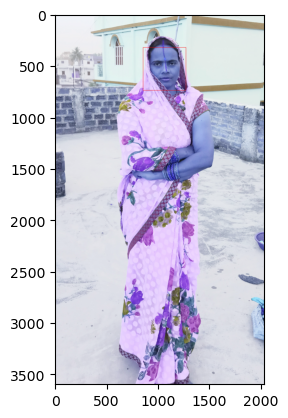

In [253]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

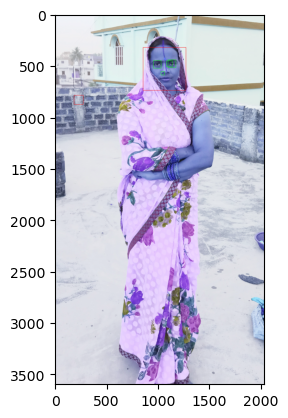

In [254]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

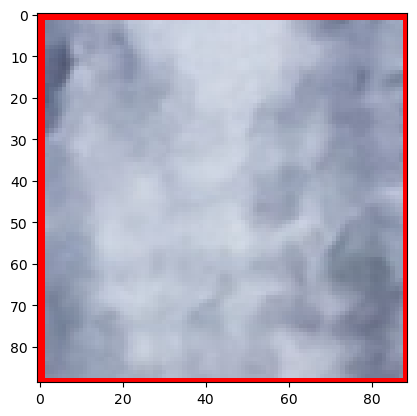

In [255]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [256]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

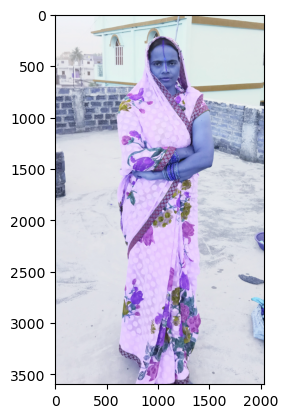

In [257]:
original_image = cv2.imread('./model/test_data/20221030_170547.jpg')
plt.imshow(original_image)

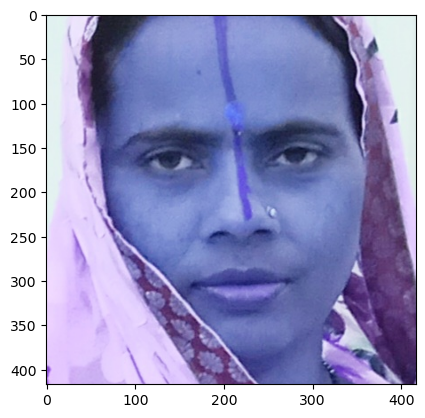

In [258]:
cropped_image = get_cropped_image_if_2_eyes('./model/test_data/20221030_170547.jpg')
plt.imshow(cropped_image)

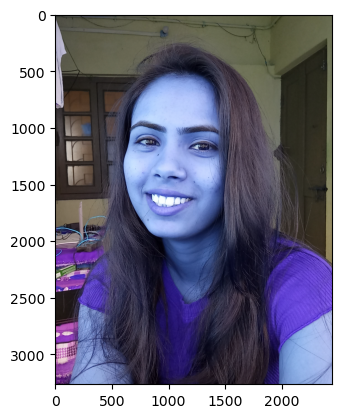

In [259]:
org_image_obstructed = cv2.imread('./model/dataset/Mine/20221115_094211.jpg')
plt.imshow(org_image_obstructed)

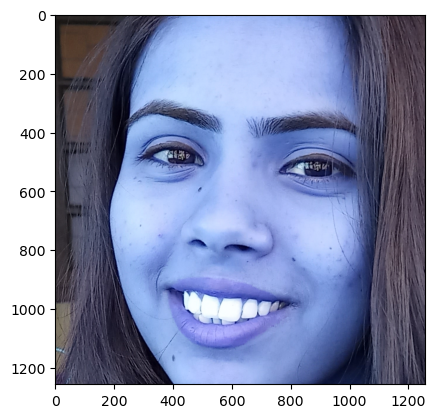

In [260]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./model/dataset/Mine/20221115_094211.jpg')
cropped_image_no_2_eyes
plt.imshow(cropped_image_no_2_eyes)

In [261]:
path_to_data = "./model/dataset"
path_to_cr_data = "./model/dataset/acropped/"

In [262]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [263]:
img_dirs

['./model/dataset\\acropped',
 './model/dataset\\Bro1',
 './model/dataset\\Bro2',
 './model/dataset\\Friend',
 './model/dataset\\Mine',
 './model/dataset\\Mom',
 './model/dataset\\Sis1',
 './model/dataset\\Sis2']

In [264]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [265]:
cropped_image_dirs = []#contains cropped folder path for each of members
celebrity_file_names_dict = {}
#(cropped_folder)
     
for img_dir in img_dirs:#iterate through each imgdirectory
    count = 1
    members_name = img_dir.split('\\')[-1]
    print(members_name)
    celebrity_file_names_dict[members_name] = [] #initialising the dictionary
    
    for entry in os.scandir(img_dir):#iterate through all folders and through all the images
        roi_color = get_cropped_image_if_2_eyes(entry.path)#entry..path has path of the img n on this we call eyes detecting fn
        #if image will have 2 eye n face clearly visible roi color will store cropped img in it else it will store none in it
        if roi_color is not None:#check if roi_color is not none which means face n 2 eyes are clearly visible
            cropped_folder = path_to_cr_data + members_name #in the folder acropped(path to cr data) create subfolder for each member
            if not os.path.exists(cropped_folder): #if  cropped folder does not exist
                os.makedirs(cropped_folder) #then create the folder
                cropped_image_dirs.append(cropped_folder) #appending cropped folders to cropedimg directory
                print("Generating cropped images in folder: ",cropped_folder)#showing that the folders are generated
                
               
            cropped_file_name = members_name + str(count) + ".png"  #generating the name of the file
            cropped_file_path = cropped_folder + "\\" + cropped_file_name #full path of the file
            
            cv2.imwrite(cropped_file_path, roi_color)#saving roi_color ie the cropped image in cropped file path 
            celebrity_file_names_dict[members_name].append(cropped_file_path)#storing name of all the file path into a dictionary which we will use later
            count=count+1
               
            
    
    

acropped
Bro1
Generating cropped images in folder:  ./model/dataset/acropped/Bro1
Bro2
Generating cropped images in folder:  ./model/dataset/acropped/Bro2
Friend
Generating cropped images in folder:  ./model/dataset/acropped/Friend
Mine
Generating cropped images in folder:  ./model/dataset/acropped/Mine
Mom
Generating cropped images in folder:  ./model/dataset/acropped/Mom
Sis1
Generating cropped images in folder:  ./model/dataset/acropped/Sis1
Sis2
Generating cropped images in folder:  ./model/dataset/acropped/Sis2


In [271]:
import numpy as np
import pywt
import cv2
def w2d(img,mode='haar',level=1):
  imArray=img
  imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
  imArray=np.float32(imArray)
  imArray /= 255; 
    
  coeffs=pywt.wavedec2(imArray,mode,level=level)
  coeffs_H=list(coeffs)
  coeffs[0] *=0;
  imArray_H=pywt.waverec2(coeffs_H,mode);
  imArray_H *= 255;
  imArray_H=np.uint8(imArray_H)
  return imArray_H

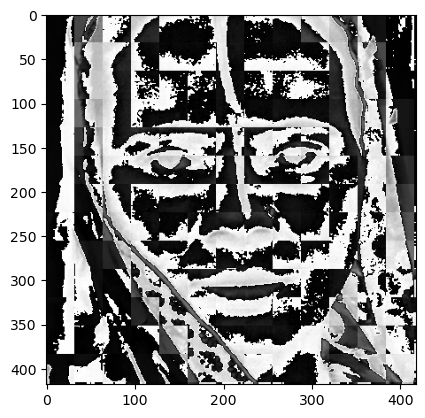

In [272]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [273]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    members_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[members_name] = file_list
celebrity_file_names_dict

{'./model/dataset/acropped/Bro1': ['./model/dataset/acropped/Bro1\\Bro11.png',
  './model/dataset/acropped/Bro1\\Bro12.png'],
 './model/dataset/acropped/Bro2': ['./model/dataset/acropped/Bro2\\Bro21.png',
  './model/dataset/acropped/Bro2\\Bro210.png',
  './model/dataset/acropped/Bro2\\Bro212.png',
  './model/dataset/acropped/Bro2\\Bro213.png',
  './model/dataset/acropped/Bro2\\Bro214.png',
  './model/dataset/acropped/Bro2\\Bro215.png',
  './model/dataset/acropped/Bro2\\Bro22.png',
  './model/dataset/acropped/Bro2\\Bro23.png',
  './model/dataset/acropped/Bro2\\Bro24.png',
  './model/dataset/acropped/Bro2\\Bro25.png',
  './model/dataset/acropped/Bro2\\Bro26.png',
  './model/dataset/acropped/Bro2\\Bro27.png',
  './model/dataset/acropped/Bro2\\Bro28.png',
  './model/dataset/acropped/Bro2\\Bro29.png'],
 './model/dataset/acropped/Friend': ['./model/dataset/acropped/Friend\\Friend1.png',
  './model/dataset/acropped/Friend\\Friend10.png',
  './model/dataset/acropped/Friend\\Friend11.png',
  '.

In [279]:
class_dict = {}
count = 0
for members_name in celebrity_file_names_dict.keys():
    class_dict[members_name] = count
    count = count + 1
class_dict

{'./model/dataset/acropped/Bro1': 0,
 './model/dataset/acropped/Bro2': 1,
 './model/dataset/acropped/Friend': 2,
 './model/dataset/acropped/Mine': 3,
 './model/dataset/acropped/Mom': 4,
 './model/dataset/acropped/Sis1': 5,
 './model/dataset/acropped/Sis2': 6}

In [280]:
X, y = [], []
for members_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[members_name])     

In [281]:
len(X[0])

4096

In [282]:
32*32*3 + 32*32

4096

In [283]:
X[0]

array([[146],
       [153],
       [152],
       ...,
       [ 18],
       [ 17],
       [  0]], dtype=uint8)

In [284]:
y[0]

0

In [285]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(65, 4096)

In [288]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.23529411764705882

In [290]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.29      1.00      0.44         2
           3       1.00      0.20      0.33         5
           4       0.17      0.33      0.22         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.24        17
   macro avg       0.24      0.26      0.17        17
weighted avg       0.36      0.24      0.19        17



C:\Users\ASUS\ANACONDAA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\ANACONDAA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\ANACONDAA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [291]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [292]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [293]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\ASUS\ANACONDAA\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\ANACONDAA\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\ANACONDAA\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.480000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.337778,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.571111,{'logisticregression__C': 1}


In [294]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [295]:
best_estimators['svm'].score(X_test,y_test)


0.23529411764705882

In [296]:
best_estimators['random_forest'].score(X_test,y_test)

0.17647058823529413

In [297]:
best_clf = best_estimators['svm']

In [298]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 3, 0, 1, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 2, 1, 2, 0, 0],
       [2, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

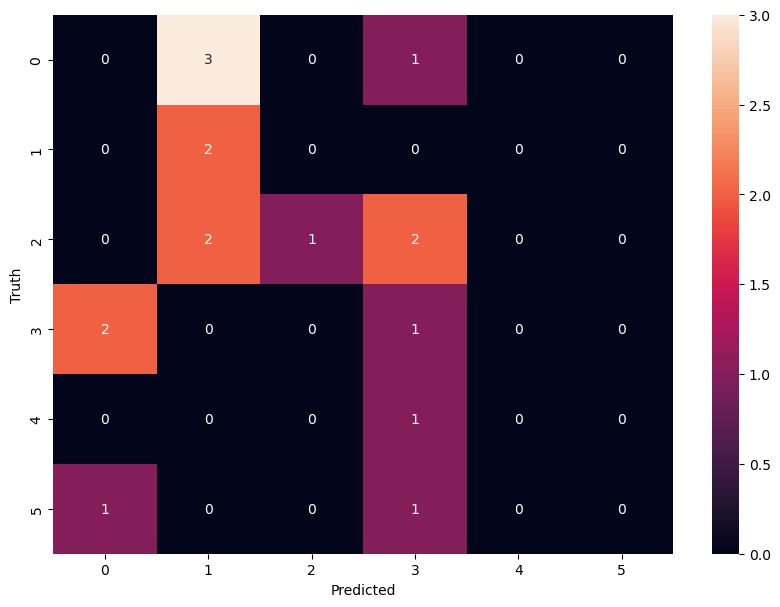

In [299]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [300]:
class_dict

{'./model/dataset/acropped/Bro1': 0,
 './model/dataset/acropped/Bro2': 1,
 './model/dataset/acropped/Friend': 2,
 './model/dataset/acropped/Mine': 3,
 './model/dataset/acropped/Mom': 4,
 './model/dataset/acropped/Sis1': 5,
 './model/dataset/acropped/Sis2': 6}

In [301]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [303]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))